In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Load data
feature_config = 1
strategy = '1-1_vb_15m'
risk_feature = True
file_path = (("""/mnt/d/Tensor_Database/01_Cryptos/Features_Eng/Feature_Engineering_conf_{}_Tickers_4_Stategy_{}.parquet""")
                .format(feature_config, strategy))

input_file_path = os.path.join( file_path)

data = pd.read_parquet(input_file_path)

In [6]:
data.columns

Index(['Date', 'Open Time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Clos Time', 'Quote Asset Volume', 'Number of Trades',
       'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore',
       'Year', 'Ticker', 'max_trades', 'threshold', 't1', 'label', 'SMA_15',
       'SMA_120', 'VWMA_60', 'VWMA_15', 'BBL_15_2.0', 'BBM_15_2.0',
       'BBU_15_2.0', 'BBB_15_2.0', 'BBP_15_2.0', 'BBL_120_2.0', 'BBM_120_2.0',
       'BBU_120_2.0', 'BBB_120_2.0', 'BBP_120_2.0', 'MACD_15_120_9',
       'MACDh_15_120_9', 'MACDs_15_120_9', 'RSI_15', 'ATRr_15', 'PDIST',
       'Close_lag_1', 'Close_lag_3', 'Close_lag_5', 'Close_lag_15',
       'Close_lag_30', 'Close_return_1m', 'Close_return_5m',
       'Close_return_15m', 'Close_return_60m', 'Close_return_240m',
       'momentum_1_5', 'momentum_1_15', 'momentum_5_15', 'momentum_1_60',
       'momentum_5_60', 'momentum_1_240', 'momentum_5_240', 'month', 'day',
       'hour', 'minute', 'Volume_sma_5', 'Volume_sma_30', 'Volume_std_5',
 

In [7]:
data[['Date', 'Ticker', 'Volume_standard','Number of Trades_standard' ]].head()

,Date,Ticker,Volume_standard,Number of Trades_standard
0,2021-09-01 05:02:00,ADAUSDT,-0.366899,-0.202125
1,2021-09-01 05:03:00,ADAUSDT,-0.266994,-0.132766
2,2021-09-01 05:04:00,ADAUSDT,-0.355755,-0.237512
3,2021-09-01 05:05:00,ADAUSDT,-0.501271,-0.322441
4,2021-09-01 05:06:00,ADAUSDT,-0.097691,-0.111534


<AxesSubplot:ylabel='Frequency'>

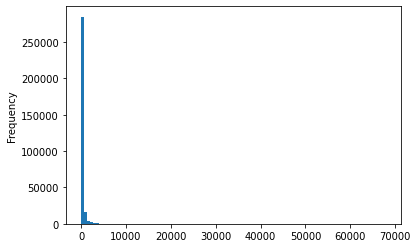

In [8]:
data[data['Ticker'] == 'ADAUSDT']['max_trades'].plot(kind = 'hist', bins = 100)

<AxesSubplot:ylabel='Frequency'>

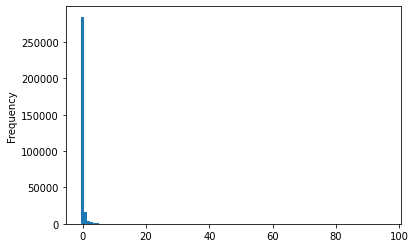

In [9]:
data[data['Ticker'] == 'ADAUSDT']['Number of Trades_standard'].plot(kind = 'hist', bins = 100)

Feature Analysis for Ticker ADAUSDT


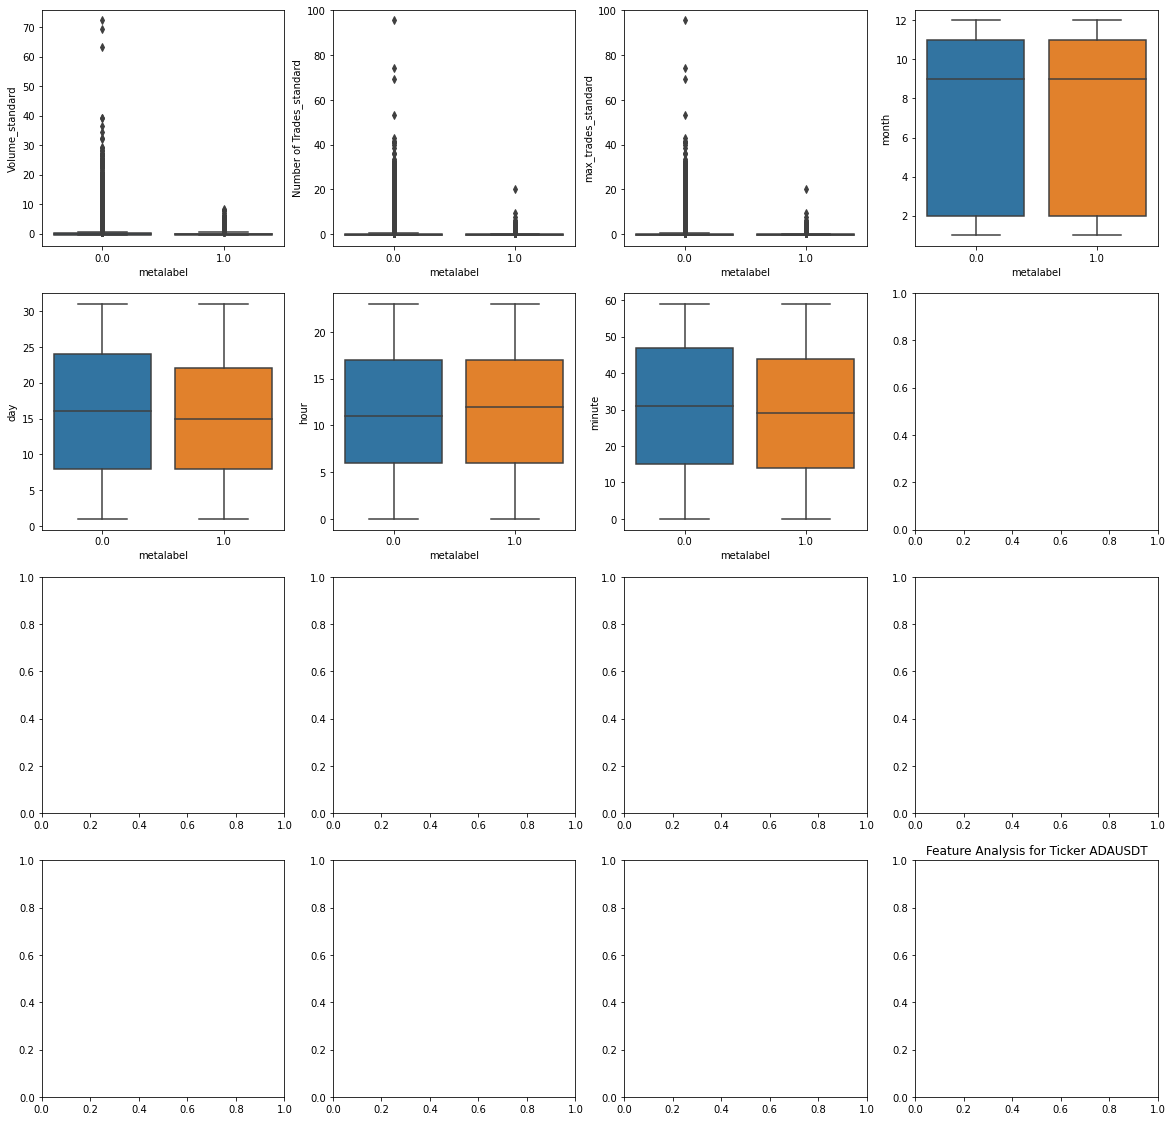

Feature Analysis for Ticker BNBBTC


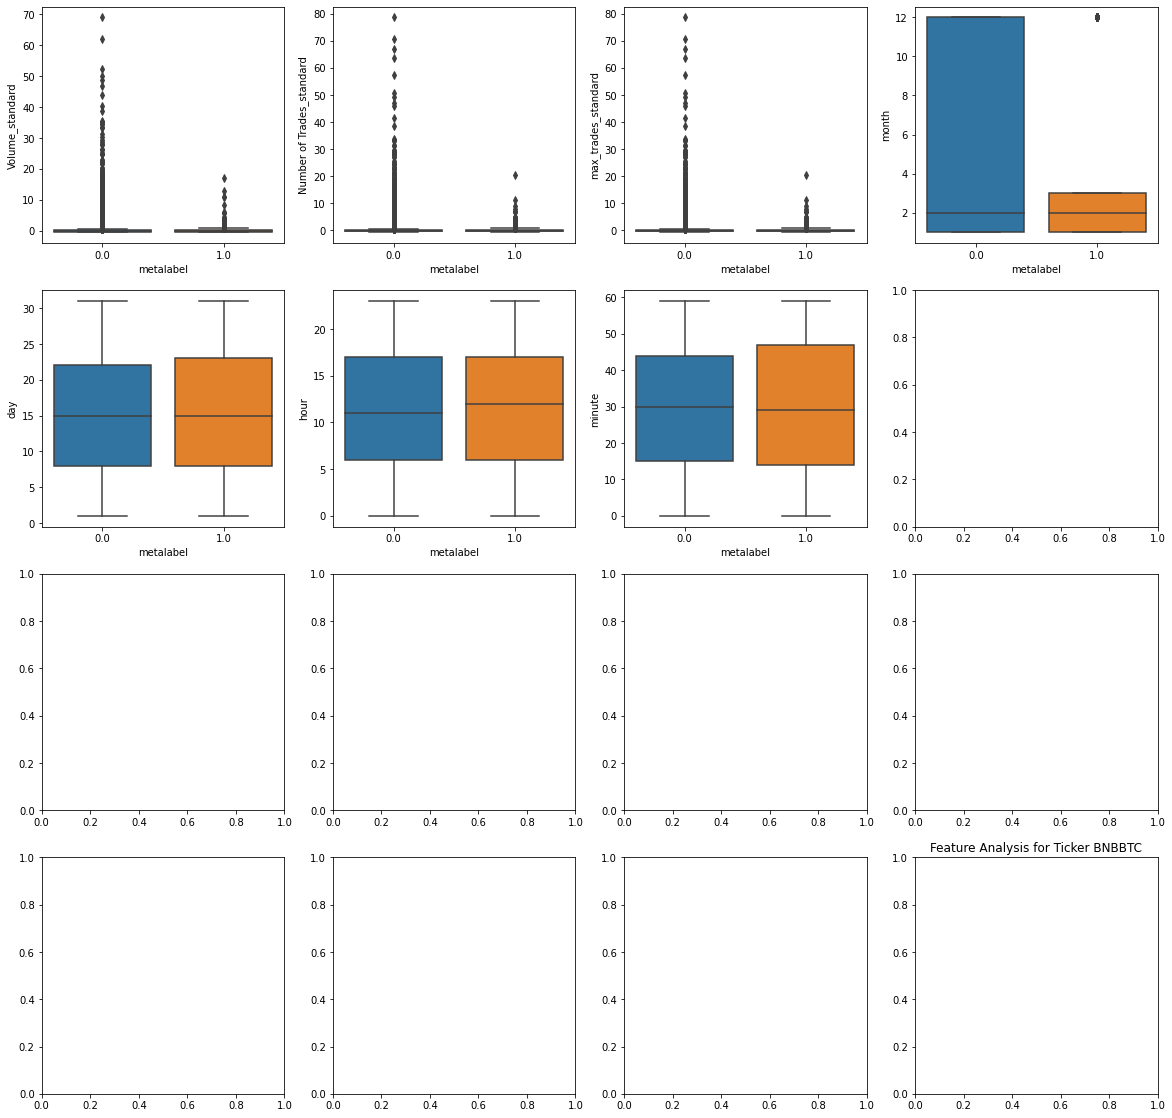

Feature Analysis for Ticker BNBUSDT


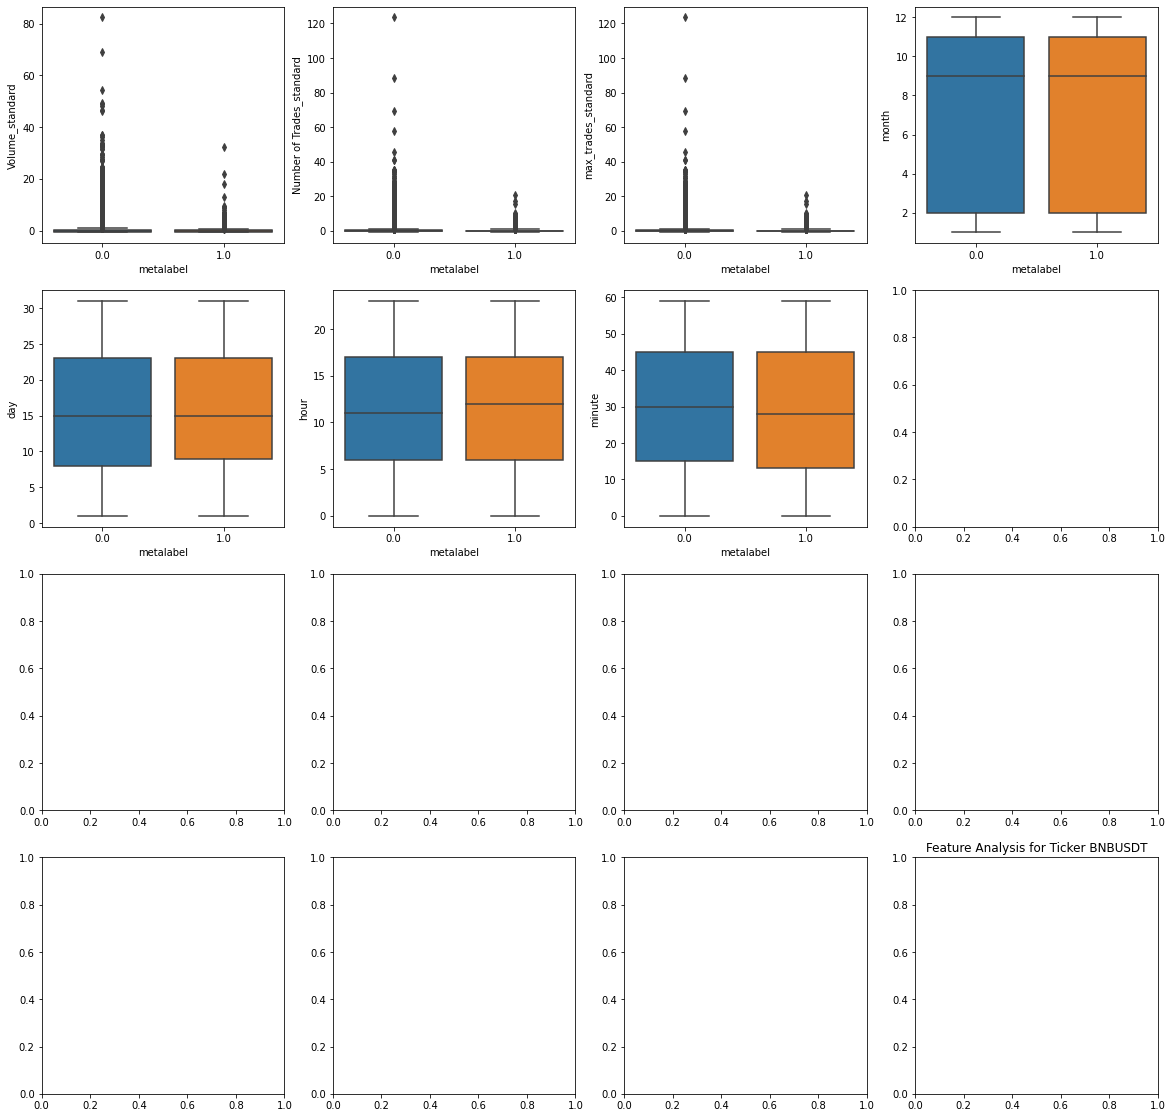

Feature Analysis for Ticker ETHUSDT


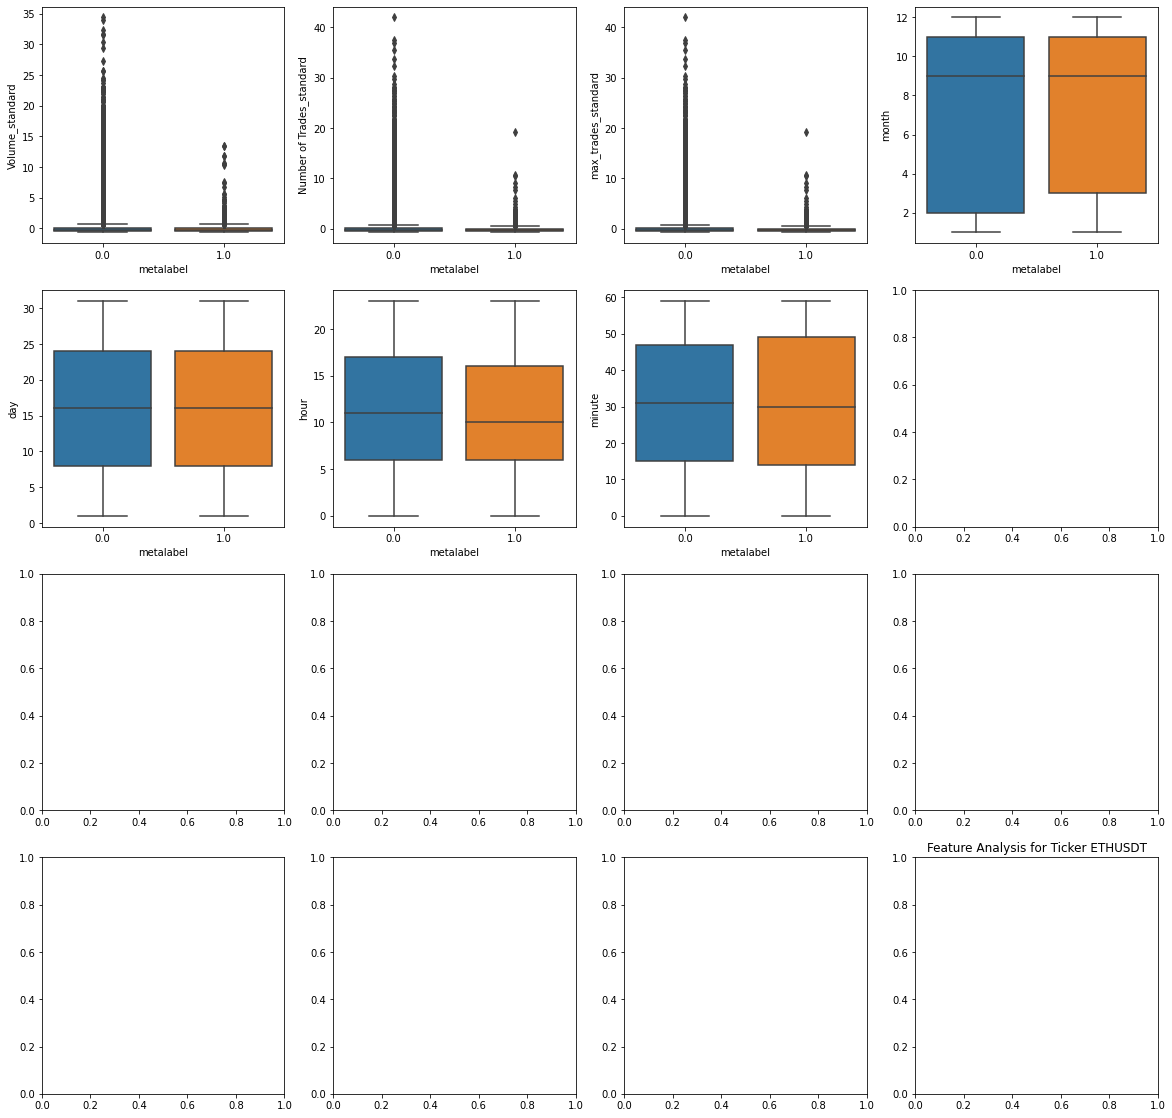

In [11]:
cols_drop = ['Date', 'Open Time', 'Open', 'High', 'Low', 'Close',
       'Clos Time', 'Quote Asset Volume',
       'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore',
       'Year', 'Ticker']

cols_to_plot = ['Volume_standard','Number of Trades_standard', 'max_trades_standard',
                'month', 'day', 'hour', 'minute', 
                 'Close_lag_1', 'Close_lag_3', 'Close_lag_5', 'Close_lag_15',
       'Close_lag_30', 'VWMA_60', 'VWMA_15','max_trades', 'Volume_sma_5', 'Volume_sma_30', 'Volume_std_5',
       'Volume_std_30','ATRr_15', 'PDIST','BBU_15_2.0', 'BBB_15_2.0', 'BBP_15_2.0', 'BBL_120_2.0', 'BBM_120_2.0',
       'BBU_120_2.0', 'BBB_120_2.0', 'BBP_120_2.0', 'MACD_15_120_9',
       'MACDh_15_120_9', 'MACDs_15_120_9']


cols_to_plot = ['Volume_standard','Number of Trades_standard', 'max_trades_standard',
                'month', 'day', 'hour', 'minute']


target_variable = 'metalabel'


for ticker in data['Ticker'].unique():
    
    print("Feature Analysis for Ticker", ticker)
    
    dims = (4,4)
    
    _df = data[data['Ticker'] == ticker].copy()
    
    f, axes = plt.subplots( dims[0], dims[1], figsize = (20, 20))

    axis_i, axis_j = 0, 0
    
    for col in cols_to_plot:

        if col in cols_drop:
            continue

        #plt.title(f"Feature Analysis for Ticker {ticker}")
        sns.boxplot( x = _df[target_variable], y = _df[col], ax = axes[axis_i, axis_j])

        axis_j += 1
        if axis_j == dims[1]:
            axis_i += 1
            axis_j = 0
            
    plt.show()
    